# What is Sklearn?
    Machine learning package for python
    
    Built on Numpy, SciPy and matplotlib
    
    Very fast and efficient
    
    Works with arrays and not dataframes so we need to transform dataframes to ndarrays
    
    Incredible documentation
    
    Variety - apart from Deep learning it contains everything
    
    Numerically stable

# Simple linear regression

## Import the relevant libraries

In [ ]:
!pip install -U sci

In [1]:
# For these lessons we will need NumPy, pandas, matplotlib and seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# and of course the actual regression (machine learning) module
from sklearn.linear_model import LinearRegression

## Load the data

In [2]:
# We start by loading the data
data = pd.read_csv('1.01. Simple linear regression.csv')

# Let's explore the top 5 rows of the df
data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


## Create the regression

### Declare the dependent and independent variables

In [3]:
# There is a single independent variable: 'SAT'
x = data['SAT']

# and a single depended variable: 'GPA'
y = data['GPA']

In [4]:
# Often it is useful to check the shapes of the features
x.shape

(84,)

In [6]:
x

0     1714
1     1664
2     1760
3     1685
4     1693
      ... 
79    1936
80    1810
81    1987
82    1962
83    2050
Name: SAT, Length: 84, dtype: int64

In [5]:
y.shape

(84,)

In [7]:
# In order to feed x to sklearn, it should be a 2D array (a matrix)
# Therefore, we must reshape it sm.add_constant
# Note that this will not be needed when we've got more than 1 feature (as the inputs will be a 2D array by default)

# x_matrix = x.values.reshape(84,1)
x_matrix = x.values.reshape(-1,1)

# Check the shape just in case
x_matrix.shape

(84, 1)

In [8]:
x_matrix

array([[1714],
       [1664],
       [1760],
       [1685],
       [1693],
       [1670],
       [1764],
       [1764],
       [1792],
       [1850],
       [1735],
       [1775],
       [1735],
       [1712],
       [1773],
       [1872],
       [1755],
       [1674],
       [1842],
       [1786],
       [1761],
       [1722],
       [1663],
       [1687],
       [1974],
       [1826],
       [1787],
       [1821],
       [2020],
       [1794],
       [1769],
       [1934],
       [1775],
       [1855],
       [1880],
       [1849],
       [1808],
       [1954],
       [1777],
       [1831],
       [1865],
       [1850],
       [1966],
       [1702],
       [1990],
       [1925],
       [1824],
       [1956],
       [1857],
       [1979],
       [1802],
       [1855],
       [1907],
       [1634],
       [1879],
       [1887],
       [1730],
       [1953],
       [1781],
       [1891],
       [1964],
       [1808],
       [1893],
       [2041],
       [1893],
       [1832],
       [18

In [9]:
x_matrix

#84,1

array([[1714],
       [1664],
       [1760],
       [1685],
       [1693],
       [1670],
       [1764],
       [1764],
       [1792],
       [1850],
       [1735],
       [1775],
       [1735],
       [1712],
       [1773],
       [1872],
       [1755],
       [1674],
       [1842],
       [1786],
       [1761],
       [1722],
       [1663],
       [1687],
       [1974],
       [1826],
       [1787],
       [1821],
       [2020],
       [1794],
       [1769],
       [1934],
       [1775],
       [1855],
       [1880],
       [1849],
       [1808],
       [1954],
       [1777],
       [1831],
       [1865],
       [1850],
       [1966],
       [1702],
       [1990],
       [1925],
       [1824],
       [1956],
       [1857],
       [1979],
       [1802],
       [1855],
       [1907],
       [1634],
       [1879],
       [1887],
       [1730],
       [1953],
       [1781],
       [1891],
       [1964],
       [1808],
       [1893],
       [2041],
       [1893],
       [1832],
       [18

### Regression itself
Full documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [10]:
# We start by creating a linear regression object
reg = LinearRegression()

In [11]:
# The whole learning process boils down to fitting the regression
# Note that the first argument is the independent variable, while the second - the dependent (unlike with StatsModels)
reg.fit(x_matrix,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Elaborating on above:

# LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


## normalize=False

#### Standardization
#### It is the process of subtracting the mean and dividing by standard deviation (a type of normalization)

#### Normalization
#### Normalization has different meaning depending on the case. we subtract the mean but divide by L2-norm of the inputs


## copy_X - when set to true, it copies the inputs before fitting them. Safety net against normalization and other transformations.

## fit_intercept - remember how we were manually adding a constant in statmodels, this param creates that constant automatically if set to true

## n_jobs - parallelization by setting # of workers


### R-squared

In [12]:
# To get the R-squared in sklearn we must call the appropriate method
reg.score(x_matrix,y)

0.40600391479679765

### Coefficients

In [13]:
# Getting the coefficients of the regression
# Note that the output is an array, as we usually expect several coefficients
reg.coef_

array([0.00165569])

### Intercept

In [14]:
# Getting the intercept of the regression
# Note that the result is a float as we usually expect a single value
reg.intercept_

0.2750402996602803

### Making predictions

In [18]:
# There is a dedicated method should we want to predict values
# Note that the result is an array, as we can predict more than one value at a time
reg.predict([[1850]])

array([3.33806319])

In [20]:
3.33-.275

3.055

In [21]:
# To be in line with our knowledge so far, we can create a pandas data frame with several different values of SAT
new_data = pd.DataFrame(data=[1740,1760],columns=['SAT'])
new_data

,SAT
0,1740
1,1760


In [22]:
# We can predict the whole data frame in bulk
# Note that the result is an array, this time with 2 elements
reg.predict(new_data)

array([3.15593751, 3.18905127])

In [23]:
# Finally, we can directly store the predictions in a new series of the same dataframe
new_data['Predicted_GPA'] = reg.predict(new_data)
new_data

,SAT,Predicted_GPA
0,1740,3.155938
1,1760,3.189051


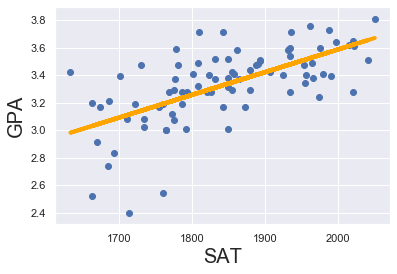

In [24]:
# There are different ways to plot the data - here's the matplotlib code
plt.scatter(x,y)

# Parametrized version of the regression line
yhat = reg.coef_*x_matrix + reg.intercept_

# Non-parametrized version of the regression line
#yhat = 0.0017*x + 0.275

# Plotting the regression line
fig = plt.plot(x,yhat, lw=4, c='orange', label ='regression line')

# Labelling our axes
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

# Articles to go through to get more clarity on Normalization

There are two materials which are particularly useful:

1) The Wikipedia article on Feature scaling: https://en.wikipedia.org/wiki/Feature_scaling

2) This article on L1-norm and L2-norm: http://www.chioka.in/differences-between-the-l1-norm-and-the-l2-norm-least-absolute-deviations-and-least-squares/